* todo: add augmentation
* todo: seperate the validation_generator from train_genarator after augmentation

In [1]:
!wget http://biomedic.doc.ic.ac.uk/brain-development/downloads/IXI/IXI-T1.tar

--2021-06-01 16:12:27--  http://biomedic.doc.ic.ac.uk/brain-development/downloads/IXI/IXI-T1.tar
Resolving biomedic.doc.ic.ac.uk (biomedic.doc.ic.ac.uk)... 146.169.22.31
Connecting to biomedic.doc.ic.ac.uk (biomedic.doc.ic.ac.uk)|146.169.22.31|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://biomedic.doc.ic.ac.uk/brain-development/downloads/IXI/IXI-T1.tar [following]
--2021-06-01 16:12:27--  https://biomedic.doc.ic.ac.uk/brain-development/downloads/IXI/IXI-T1.tar
Connecting to biomedic.doc.ic.ac.uk (biomedic.doc.ic.ac.uk)|146.169.22.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4840816640 (4.5G) [application/x-tar]
Saving to: ‘IXI-T1.tar’

IXI-T1.tar          100%[===================>]   4.51G  46.6MB/s    in 90s     

2021-06-01 16:13:57 (51.5 MB/s) - ‘IXI-T1.tar’ saved [4840816640/4840816640]



In [2]:
!wget http://biomedic.doc.ic.ac.uk/brain-development/downloads/IXI/IXI.xls

URL transformed to HTTPS due to an HSTS policy
--2021-06-01 16:14:01--  https://biomedic.doc.ic.ac.uk/brain-development/downloads/IXI/IXI.xls
Resolving biomedic.doc.ic.ac.uk (biomedic.doc.ic.ac.uk)... 146.169.22.31
Connecting to biomedic.doc.ic.ac.uk (biomedic.doc.ic.ac.uk)|146.169.22.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 210432 (206K) [application/vnd.ms-excel]
Saving to: ‘IXI.xls’

IXI.xls             100%[===================>] 205.50K  --.-KB/s    in 0.03s   

2021-06-01 16:14:01 (5.92 MB/s) - ‘IXI.xls’ saved [210432/210432]



In [3]:
!mkdir dataset

In [4]:
!tar -xvf  'IXI-T1.tar' -C 'dataset'

IXI002-Guys-0828-T1.nii.gz
IXI012-HH-1211-T1.nii.gz
IXI013-HH-1212-T1.nii.gz
IXI014-HH-1236-T1.nii.gz
IXI015-HH-1258-T1.nii.gz
IXI016-Guys-0697-T1.nii.gz
IXI017-Guys-0698-T1.nii.gz
IXI019-Guys-0702-T1.nii.gz
IXI020-Guys-0700-T1.nii.gz
IXI021-Guys-0703-T1.nii.gz
IXI022-Guys-0701-T1.nii.gz
IXI023-Guys-0699-T1.nii.gz
IXI024-Guys-0705-T1.nii.gz
IXI025-Guys-0852-T1.nii.gz
IXI026-Guys-0696-T1.nii.gz
IXI027-Guys-0710-T1.nii.gz
IXI028-Guys-1038-T1.nii.gz
IXI029-Guys-0829-T1.nii.gz
IXI030-Guys-0708-T1.nii.gz
IXI031-Guys-0797-T1.nii.gz
IXI033-HH-1259-T1.nii.gz
IXI034-HH-1260-T1.nii.gz
IXI035-IOP-0873-T1.nii.gz
IXI036-Guys-0736-T1.nii.gz
IXI037-Guys-0704-T1.nii.gz
IXI038-Guys-0729-T1.nii.gz
IXI039-HH-1261-T1.nii.gz
IXI040-Guys-0724-T1.nii.gz
IXI041-Guys-0706-T1.nii.gz
IXI042-Guys-0725-T1.nii.gz
IXI043-Guys-0714-T1.nii.gz
IXI044-Guys-0712-T1.nii.gz
IXI045-Guys-0713-T1.nii.gz
IXI046-Guys-0824-T1.nii.gz
IXI048-HH-1326-T1.nii.gz
IXI049-HH-1358-T1.nii.gz
IXI050-Guys-0711-T1.nii.gz
IXI051-HH-1328-T1.ni

In [5]:
!rm 'IXI-T1.tar'

In [6]:
!pip install dltk

     |████████████████████████████████| 296kB 10.5MB/s 
     |████████████████████████████████| 47.4MB 64kB/s 
  Created wheel for dltk: filename=dltk-0.2.1-py2.py3-none-any.whl size=37255 sha256=17b6d71802a76eda2ec41175ecde6e35f4ee23d37aed7c36da5a83b4f6e39b5e
  Stored in directory: /root/.cache/pip/wheels/9d/72/c6/8d739d38edc23d5f5e58aeaeff23df0236bb2449edccf93898
Successfully built dltk


In [ ]:
!mkdir 'weights'

In [1]:
import os
import matplotlib.pyplot as plt
import glob
import h5py
import shutil
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from os import listdir, makedirs, getcwd, remove
from os.path import isfile, join, abspath, exists, isdir, expanduser
from PIL import Image
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import cv2
import pandas as pd
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
import numpy as np
import sys
import os
import PIL
import PIL.Image as Image
import seaborn as sns
import warnings
import nibabel as nib
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from dltk.io.preprocessing import whitening
from dltk.io.augmentation import flip
import time
print('All imported!')

All imported!


In [27]:
!git clone https://github.com/Moeinh77/keras-resnet3d.git
%cd keras-resnet3d
from resnet3d import Resnet3DBuilder
!python setup.py build
%cd ../
!ls

fatal: destination path 'keras-resnet3d' already exists and is not an empty directory.
/content/keras-resnet3d
running build
running build_py
/content
dataset  IXI.xls  keras-resnet3d  sample_data  weights


In [3]:
img_directory = 'dataset'
dataset_info = pd.read_excel('IXI.xls')
dataset_info.head()

,IXI_ID,"SEX_ID (1=m, 2=f)",HEIGHT,WEIGHT,ETHNIC_ID,MARITAL_ID,OCCUPATION_ID,QUALIFICATION_ID,DOB,DATE_AVAILABLE,STUDY_DATE,AGE
0,1,1,170,80,2,3,5,2,1968-02-22,0,NaT,NaN
1,2,2,164,58,1,4,1,5,1970-01-30,1,2005-11-18,35.800137
2,12,1,175,70,1,2,1,5,1966-08-20,1,2005-06-01,38.781656
3,13,1,182,70,1,2,1,5,1958-09-15,1,2005-06-01,46.710472
4,14,2,163,65,1,4,1,5,1971-03-15,1,2005-06-09,34.236824


### Making the dataset generator 

In [4]:
# reading the MRI images with nibabel and
# identifying file names that are not mentioned in the EXCEL file

image_files = []
labels = []
not_included = []
for filename in os.listdir(img_directory):
    try:
        # reading the label from Excel
        img_id = int(filename[3:6])
        sex = np.array(dataset_info[dataset_info.IXI_ID == img_id])[0][1]
        labels.append(sex-1)
        # reading images
        img = nib.load(img_directory+"/"+filename)
        image_files.append(img)
    except Exception as e:
        print(e)
        not_included.append(filename)
        
len(not_included)

index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0


15

In [5]:
len(image_files), len(labels)

(566, 566)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(image_files, labels, test_size=0.2,
                                                    random_state =1, stratify = labels )

len(X_train), len(X_test)

(452, 114)

In [7]:
def count_class(labels):
    zero = 0
    one = 0
    for l in labels:
        if l == 0:
             zero += 1
        else:
            one += 1
    return zero, one, zero/ one

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


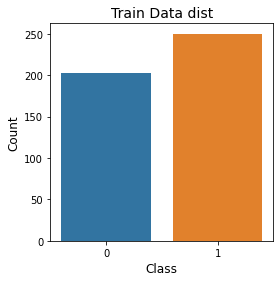

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(202, 250, 0.808)


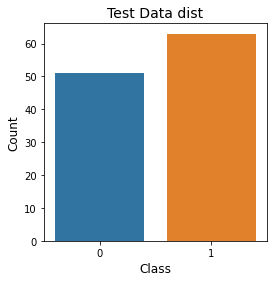

(51, 63, 0.8095238095238095)


In [8]:
from seaborn import countplot

# Plot the results 
plt.figure(figsize=(4,4))
c1 = countplot(y_train)
plt.title('Train Data dist', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.show()
print(count_class(y_train))

plt.figure(figsize=(4,4))
c2 = countplot(y_test)
plt.title('Test Data dist', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.show()

print(count_class(y_test))

In [16]:
from sklearn.utils import class_weight
weight = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
weights = {i : weight[i] for i in range(2)}
weights

{0: 1.118811881188119, 1: 0.904}

In [ ]:
# y_train = np.array(y_train).reshape(-1, 1)
# y_test = np.array(y_test).reshape(-1, 1)

# y_train.shape, y_test.shape

In [ ]:
# # making a list out of the files that are in the EXCEL file
# filenames = []
# for filename in os.listdir(img_directory):
#     if filename not in not_included:
#         filenames.append(filename)
        
# len(filenames), len(not_included)

(256, 256, 150)


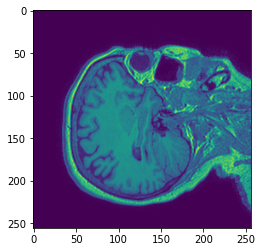

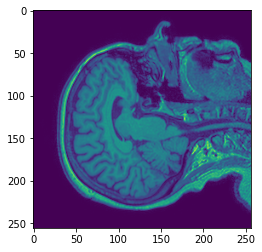

In [17]:
img = np.array(image_files[0].dataobj)
print(img.shape)
img = flip(img, axis=1)
plt.imshow(img[:,:, 50])
plt.show()
plt.imshow(img[:,:, 80])
plt.show()

### Defining the generator

In [18]:
bs = 4

In [20]:
def my_data_gen(images, labels, batch_size= 16, method = None, test_run = False, train_ = True):#, resize= False, resize_scale = 2):
    
    data = []
    labels_in_func = []
    i = 0 # for the batch
    j = 0 # for selecting the image
    
    while True:
        try:
            if j >= len(images):
                j = 0
            if test_run:
                print('j=',j)
                print()
                # continue
            
            labels_in_func.append(labels[j])

            img = images[j]
            j += 1

##             rescaling the image, although the problem is the output images does not have the same size
#             if resize:
#                 img = resample_img(img, target_affine=np.eye(3)*resize_scale, interpolation='nearest')
#                 print(img.shape)
            
            img = np.array(img.dataobj)
            dx , dy = img.shape[0], img.shape[1]
            
            # add zero channels to images with fewer channels than others
            if method == 'add_channels':
                dz = 150
                if img.shape[2] != 150:
                    img = np.concatenate((img, np.zeros((img.shape[0],img.shape[1],150-img.shape[2]))), axis =2)
            elif method == 'del_channels':
                dz = 40
                img = img[:,:,40:80]
            
            img = whitening(img)

            if train_:
                img = flip(img, axis=1)
                
#             img_id = int(filename[3:6])
#             sex = np.array(dataset_info[dataset_info.IXI_ID == img_id])[0][1]
            
            data.append(img)
            
            i += 1
            if i == batch_size:
                i = 0
                yield np.array(data).reshape(batch_size, dx, dy, dz, 1), np.array(labels_in_func).reshape(-1, 1)
                data = []
                labels_in_func = []
                
        except Exception as e:
            print(filename)
            print(e)

In [21]:
data_gen_train = my_data_gen(X_train, y_train, batch_size = bs, method ='add_channels', train_ = True)
data_gen_test = my_data_gen(X_test, y_test, batch_size = bs, method ='add_channels', train_ =  False)

In [22]:
# for i in my_data_gen(X_test, y_test, batch_size = bs, method ='add_channels', test_run= True):
#     print(i[0].shape, i[1].shape)

In [23]:
# i1, l1 = next(data_gen_train)
# i1.shape, l1.shape

In [24]:
# i2, l2 = next(data_gen_test)
# i2.shape, l2.shape

### Defining the model

Cloning into 'keras-resnet3d'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 109 (delta 0), reused 0 (delta 0), pack-reused 105
Receiving objects: 100% (109/109), 24.94 KiB | 4.16 MiB/s, done.
Resolving deltas: 100% (42/42), done.
/content/keras-resnet3d
running build
running build_py
creating build
creating build/lib
creating build/lib/resnet3d
copying resnet3d/__init__.py -> build/lib/resnet3d
copying resnet3d/resnet3d.py -> build/lib/resnet3d


In [28]:
in_size = 256
in_dim = 150

model = Resnet3DBuilder.build_resnet_18((in_size, in_size, in_dim, 1), num_outputs = 1, reg_factor= 0.0001)

opt = Adam(3e-3) 
model.compile(loss= 'binary_crossentropy', metrics=['accuracy'], optimizer=opt)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 15 0                                            
__________________________________________________________________________________________________
conv3d (Conv3D)                 (None, 128, 128, 75, 22016       input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 75, 256         conv3d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 128, 128, 75, 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [30]:
steps = len(X_train) // bs
valid_steps = len(X_test) // (bs)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=3, verbose=1,
    mode='auto', min_delta=0.001, cooldown=0, min_lr=1e-8)


chkpt = ModelCheckpoint(filepath='weights', save_best_only=True,
                        save_weights_only=True, monitor= 'val_accuracy', mode='max')

In [31]:
start = time.time()

nb_epochs = 3 

# Fit the model
history= model.fit(data_gen_train, epochs= nb_epochs, steps_per_epoch= steps,
                              validation_data=data_gen_test, validation_steps=valid_steps,
                              callbacks=[chkpt, reduce_lr], #, [chkpt, clr, es , reduce_lr]
                              class_weight=weights)
end = time.time()

print('*'*40)
print('Took {:.2f} minutes'. format((end-start)/60))

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/10
113/113 [==============================] - 658s 6s/step - loss: 1.4878 - accuracy: 0.6475 - val_loss: 71.2312 - val_accuracy: 0.5536
Epoch 2/10
113/113 [==============================] - 623s 6s/step - loss: 0.7402 - accuracy: 0.7848 - val_loss: 5.0966 - val_accuracy: 0.5536
Epoch 3/10
113/113 [==============================] - 623s 6s/step - loss: 0.6419 - accuracy: 0.7903 - val_loss: 1.8325 - val_accuracy: 0.4464
Epoch 4/10
  1/113 [..............................] - ETA: 9:31 - loss: 1.1038 - accuracy: 0.5000

KeyboardInterrupt: ignored